In [ ]:
import getpass

APIKEY = getpass.getpass()

··········


# Image to Text: Testing the Accuracy of GCP's Vision API

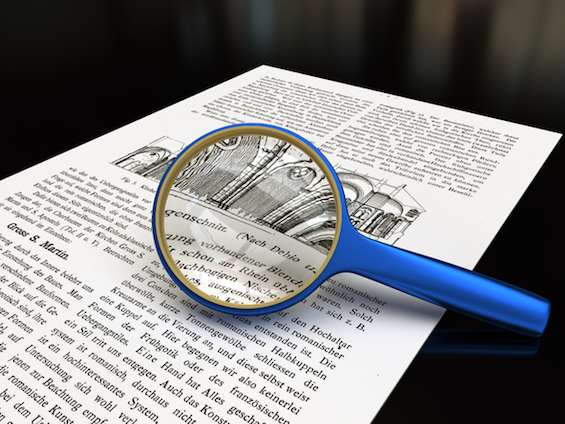

Link to our Github Repo: https://github.com/heyosolim2/QTM250Group12

# Introduction and Motivation

Optical Character Recognition (OCR) dates back to the early days of telegraphy in the 1920s. As a century passes since its origin, we are interested in exploring the innovation in OCR tools that exist today. For our purpose we're interested in seeing how accurately Google Cloud Platform's Vision API can convert text inputted as images to text files.

# Methodology
To ensure sufficient variation exists in the types of data we feed to the model we defined three categories of inputs: easy, medium, hard. Each member of our group has contributed one image to each category, with the "easy" images comprising of screenshots of text seen on webpages, "medium" images comprising of scanned images of typed (printed) pages, and the "hard" images comprising of pictures of each of our handwritten documents. Given that all members of this group have different handwritings, with respect to inputs we were able to provide the most variation in the hard category. 

Further the accuracy of robutness of the output is defined as follows:
$Robustness = \frac{No.\;of\;words\;correctly\;predicted\;in\;output\;file}{Total\;No.\;of\;words\;in\;input\;file}$

# Hypothesis
We hypothesize that, as the input category gets harder, the robustness of the model should decrease. Thus we think the easy images should result in higher robustness than the medium ones, and the medium images should result in higher robustness than the hard ones.

In [ ]:
# import build
from googleapiclient.discovery import build

In [ ]:
easy_list = ["gs://qtm250-hw4-group12/easy1.png", "gs://qtm250-hw4-group12/easy2.heic",  "gs://qtm250-hw4-group12/easy3.heic", "gs://qtm250-hw4-group12/easy4.HEIC"]
med_list = ["gs://qtm250-hw4-group12/med1.png", "gs://qtm250-hw4-group12/medium2.heic", "gs://qtm250-hw4-group12/medium3.heic", "gs://qtm250-hw4-group12/med4.HEIC"]
hard_list = ["gs://qtm250-hw4-group12/hard1.jpg", "gs://qtm250-hw4-group12/hard2.HEIC", "gs://qtm250-hw4-group12/hard3.HEIC", "gs://qtm250-hw4-group12/hard4.HEIC"]

In [ ]:
#IMAGE="gs://qtm250-hw4-group12/easy1.png"

def vision_api_call(image_file) :
  vservice = build('vision', 'v1', developerKey=APIKEY)
  request = vservice.images().annotate(body={
          'requests': [{
                  'image': {
                      'source': {
                          'gcs_image_uri': image_file
                      }
                  },
                  'features': [{
                      'type': 'TEXT_DETECTION',
                      'maxResults': 3,
                  }]
              }],
          })
  responses = request.execute(num_retries=3)
  return responses

In [ ]:
easy_text = []
med_text = []
hard_text = []

print("Text From Webpages\n")
i = 1
for x in easy_list:
  print('Excerpt {}\n'.format(i))
  response = vision_api_call(x)
  text_body = response['responses'][0]['textAnnotations'][0]['description']
  print(text_body)
  easy_text.append(text_body)
  text_len = len(text_body.split())
  print('Number of words: {}\n'.format(text_len))  
  i += 1

Text From Webpages

Excerpt 1



HttpError: ignored

In [ ]:
print("Text From Typed Documents\n")
i = 1
for x in med_list:
  print('Excerpt {}\n'.format(i))
  response = vision_api_call(x)
  text_body = response['responses'][0]['textAnnotations'][0]['description']
  print(text_body)
  med_text.append(text_body)
  text_len = len(text_body.split())
  print('Number of words: {}\n'.format(text_len))
  i += 1

Text From Typed Documents

Introduction
My Passion
Teaching is my passion. I love helping people understand new concepts and giving them tools to help them
excel in their passions.
My first official experience teaching was in college at the University of Pennsylvania, when I became a
teaching assistant for an undergraduate computer science course during my second year. I went on to TA
for several other courses, and I eventually launched my own computer science course there, focused on
hands-on skills.
As an engineer at Google, training and mentoring new engineers were some of the things I enjoyed most. I

Number of words: 96

she's skipping school
she's been crying
then Raelynn emerges, carrying two slurpees
Shelby smiles weakly, but genuinely
SHELBY
(this is a repeated argument)
you shouldn't be skipping school
RAELYNN
if you say that one more time I'm literally actually going to murder you
SHELBY
your dad is gonna write a sermon about how I'm the antichrist
RAELYNN
keep going

Number

In [ ]:
print("Text From Handwritten Documents\n")

i = 1
for x in hard_list:
  print('Excerpt {}\n'.format(i))
  response = vision_api_call(x)
  text_body = response['responses'][0]['textAnnotations'][0]['description']
  print(text_body)
  hard_text.append(text_body)
  text_len = len(text_body.split())
  print('Number of words: {}\n'.format(text_len))
  i += 1

Text From Handwritten Documents

Excerpt 1

Bible Study Session 1
Saturday, February , 2022 Lnnee goal is relation she wI cn
7:46 PM
if youre compeles to
share somathing
-pray for ene another.
·lonlivess
no one in the wnd cared enogh
to pray for you.
Scam idea that
బ లbe
from
chnrch, y0u
con.
-using people's naw
when you pray.
you can chare in
certain preyo
gt. about
reavesto (for your selt+ r
Othera).
-gather school Supplies
Cow mcome families.

Number of words: 74

Excerpt 2

A. Rejecting the null implies hetroskadesticity.
Hetrosledenticity invalidates the veriance formules from
the OLS estmates so the stonderd erroo ede wrery.
The Fand t test became invalidas we no
looger
howe en F and t distribution.GLSis no
loger blue A dditicnallyOLS is no loger
ayuptetically etticint in the classof estimators
-as descibin the theoren of asympstic
efficieney of OLS iR Undr GM essungtions as
estimtors huve the smallest asymptstic Uscience

Number of words: 70

Excerpt 3

Video 1.1:
Treatment Grou

In [23]:
from google.colab import auth
auth.authenticate_user()

In [25]:
#importing google spreadsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
import pandas as pd
import matplotlib.pyplot as plt
#bringing in spreadsheet data
sp = gc.open_by_url('https://docs.google.com/spreadsheets/d/1lHN2bpZval_roapo8f_UD4PWW-C-jWE93kyo7JzVG8Q/edit?usp=sharing')
sheet = sp.worksheet('Sheet1')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df

,Difficulty,# of Words,# of Words Correct,% Robustness
1,Easy,106,106,100%
2,Medium,96,96,100%
3,Hard,74,47,64%
4,Easy,68,68,100%
5,Medium,59,59,100%
6,Hard,70,37,53%
7,Easy,49,49,100%
8,Medium,58,58,100%
9,Hard,73,67,92%
10,Easy,68,68,100%


# RESULTS
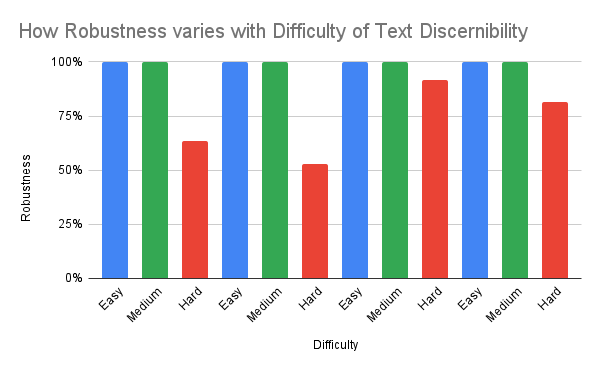

Consistent with our expectations, the accuracy of the model is lowered as it encounters “hard” images. However, surprisingly, the model is completely accurate across both “easy” and “medium” image categories. This may just be suggestive of how, as long as the text in the images is typed out, the image clarity is a smaller determinant of accuracy. It appears that the Vision API’s accuracy is more effected by the uniqueness of writing styles across different people’s writing.

# Conclusion

The use of the Vision API above, allows us to see that it is a powerful tool for accurately converting images to text files. The desirability of this tool specifically lies in it’s time-effective nature as opposed to the laborious task of manually typing out the text in image files. However, the the API’s effectiveness is somewhat questioned when it is encountering handwritten images and it may not be as reliable in this specific case. Still, across different categories (scans and screenshots) of images with typed out text, the tool can be deemed a powerful one. 

# Architecture Diagram



![Vision API ML Architecture Diagram](https://github.com/angela00kim/QTM250HW4/blob/main/QTM250%20hw4%20diagram.png?raw=true)

As shown in the digram above, the flow is as follows:

1.   Upload image files to a Cloud Storage bucket: image files are the data 
2.   Sends each segment to Vision API for annotation processing
3.   Stores all annotation in a Google Sheet for further analysis 
